In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [2]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


In [3]:
scaler.fit(X_train)

MinMaxScaler()

In [4]:
# transform data
X_train_scaled = scaler.transform(X_train)
# print dataset properties before and after scaling
print('transformed shape: {}'.format(X_train_scaled.shape))
print('per-feature mimimum before scaling:\n {}'.format(X_train.min(axis=0)))
print('per-feature maximum before scaling:\n {}'.format(X_train.max(axis=0)))
print('per-feature mimimum after scaling:\n {}'.format(
    X_train_scaled.min(axis=0)))
print('per-feature maximum after scaling:\n {}'.format(
    X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature mimimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature mimimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [5]:
# transform test data
X_test_scaled = scaler.transform(X_test)
# print test data properties after scaling
print('per-feature mimimum after scaling:\n{}'.format(X_test_scaled.min(axis=0)))
print('per-feature maximum after scaling:\n{}'.format(X_test_scaled.max(axis=0)))



per-feature mimimum after scaling:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


In [6]:
import matplotlib.pyplot as plt

In [7]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svm = SVC(C=100)
svm.fit(X_train, y_train)
print('Test set accuracy: {:.2f}'.format(svm.score(X_test, y_test)))

Test set accuracy: 0.94


In [8]:
# preprocessing using 0-1 scaling
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

#scoring on the scaled test set
print('Scaled test set accuracy: {:.2f}'.format(
    svm.score(X_test_scaled, y_test)))


Scaled test set accuracy: 0.97


In [9]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print('SVM test svvuracyL {:.2f}'.format(svm.score(X_test_scaled, y_test)))

SVM test svvuracyL 0.96


In [10]:
import numpy as np

C:\Users\burke\AppData\Local\Temp\ipykernel_17144\2261742509.py:17: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


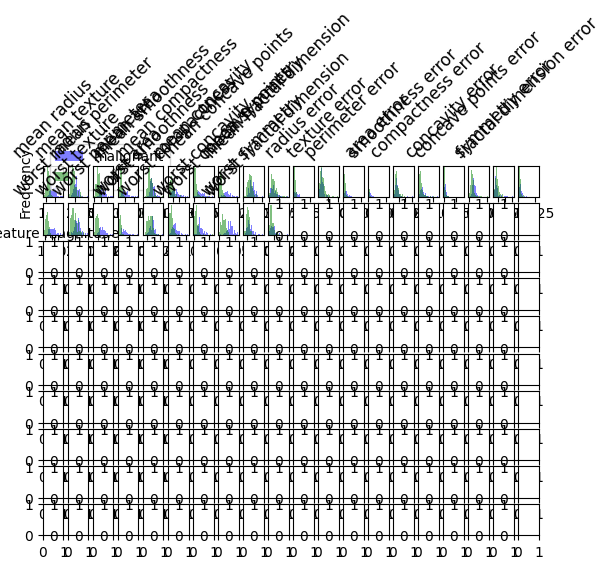

In [11]:
fig, axes = plt.subplots(10, 20)
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins = 50)
    ax[i].hist(malignant[:,i], bins = bins, color = 'blue', alpha = 0.5)
    ax[i].hist(benign[:,i], bins = bins, color = 'green', alpha = 0.5)
    ax[i].set_title(cancer.feature_names[i], rotation = 45)
    ax[i].set_yticks(())

ax[0].set_xlabel('Feature magnitude')
ax[0].set_ylabel('Frequency')
ax[0].legend(['malignant', 'benign'], loc='best')
fig.tight_layout()

In [12]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [13]:
from sklearn.decomposition import PCA

# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to breast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print('orignal shape: {}'.format(str(X_scaled.shape)))
print('reduced shape: {}'.format(str(X_pca.shape)))

orignal shape: (569, 30)
reduced shape: (569, 2)


In [14]:
print('PCA compenent shape: {}'.format(pca.components_.shape))

PCA compenent shape: (2, 30)


In [15]:
print('PCA compenents:\n{}'.format(pca.components_))

PCA compenents:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'Principal components')

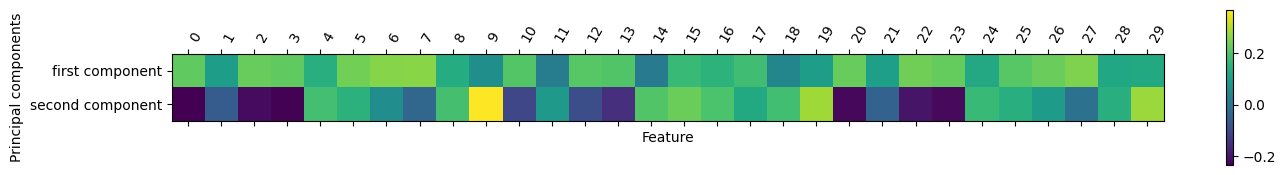

In [16]:
plt.matshow(pca.components_, cmap = 'viridis')
plt.yticks([0,1],['first component', 'second component'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), rotation =60, ha='left')
plt.xlabel('Feature')
plt.ylabel('Principal components')

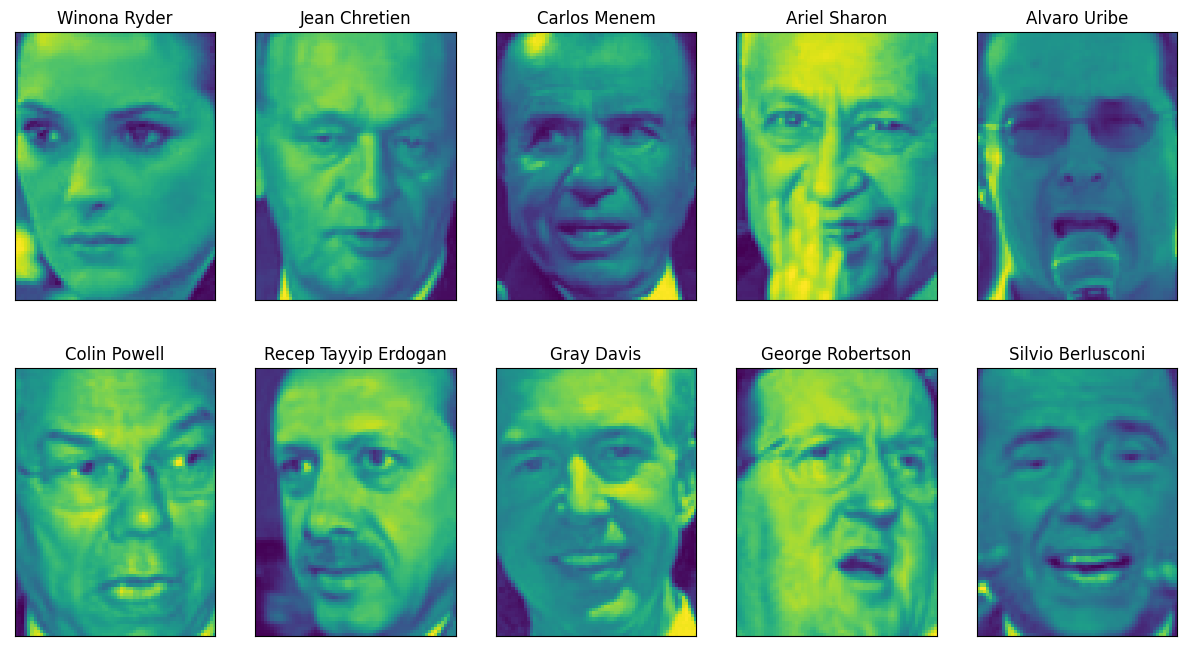

In [17]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize = 0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize = (15, 8), subplot_kw={'xticks': (), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])


In [18]:
print('people.images.shape: {}'.format(people.images.shape))
print('number of classes: {}'.format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
number of classes: 62


In [19]:
# count how often each target appears
counts = np.bincount(people.target)
# print counts next to trarget names
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print('{0:25}{1:3}'.format(name, count), end='')
    if (i+1) % 3 ==0:
        print()


Alejandro Toledo          39Alvaro Uribe              35Amelie Mauresmo           21
Andre Agassi              36Angelina Jolie            20Ariel Sharon              77
Arnold Schwarzenegger     42Atal Bihari Vajpayee      24Bill Clinton              29
Carlos Menem              21Colin Powell             236David Beckham             31
Donald Rumsfeld          121George Robertson          22George W Bush            530
Gerhard Schroeder        109Gloria Macapagal Arroyo   44Gray Davis                26
Guillermo Coria           30Hamid Karzai              22Hans Blix                 39
Hugo Chavez               71Igor Ivanov               20Jack Straw                28
Jacques Chirac            52Jean Chretien             55Jennifer Aniston          21
Jennifer Capriati         42Jennifer Lopez            21Jeremy Greenstock         24
Jiang Zemin               20John Ashcroft             53John Negroponte           31
Jose Maria Aznar          23Juan Carlos Ferrero       28Junichiro

In [20]:
mask = np.zeros(people.target.shape, dtype= bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

# scale the grayscale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability
X_people = X_people / 255

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
# split the data into trining and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)

# build a KNeighborsClassifier using one neighbor
knn.fit(X_train, y_train)
print('Test set score of 1-nn: {:.2f}'.format(knn.score(X_test, y_test)))

Test set score of 1-nn: 0.21


In [22]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print('X_train_pca.shape: {}'.format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


In [23]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print('Test set accuacy: {:.2f}'.format(knn.score(X_test_pca, y_test)))

Test set accuacy: 0.30


In [24]:
print('pca.components_.shape: {}'.format(pca.components_.shape))


pca.components_.shape: (100, 5655)


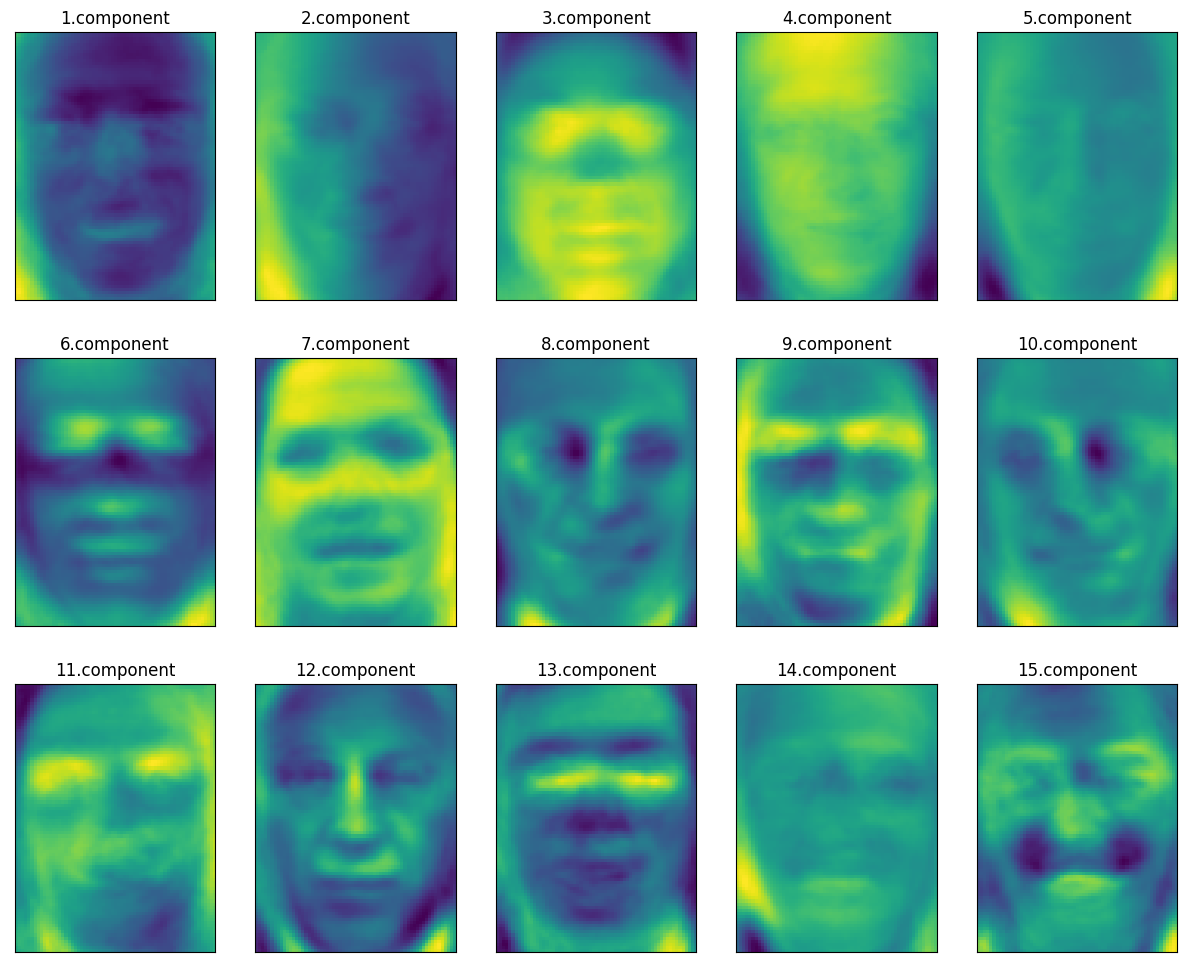

In [25]:
fig, axes = plt.subplots(3, 5, figsize = (15, 12),
    subplot_kw= {'xticks':(), 'yticks': ()})

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),
    cmap = 'viridis')
    ax.set_title('{}.component'.format((i+1)))

c:\Users\burke\venv_python\ml_venv\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


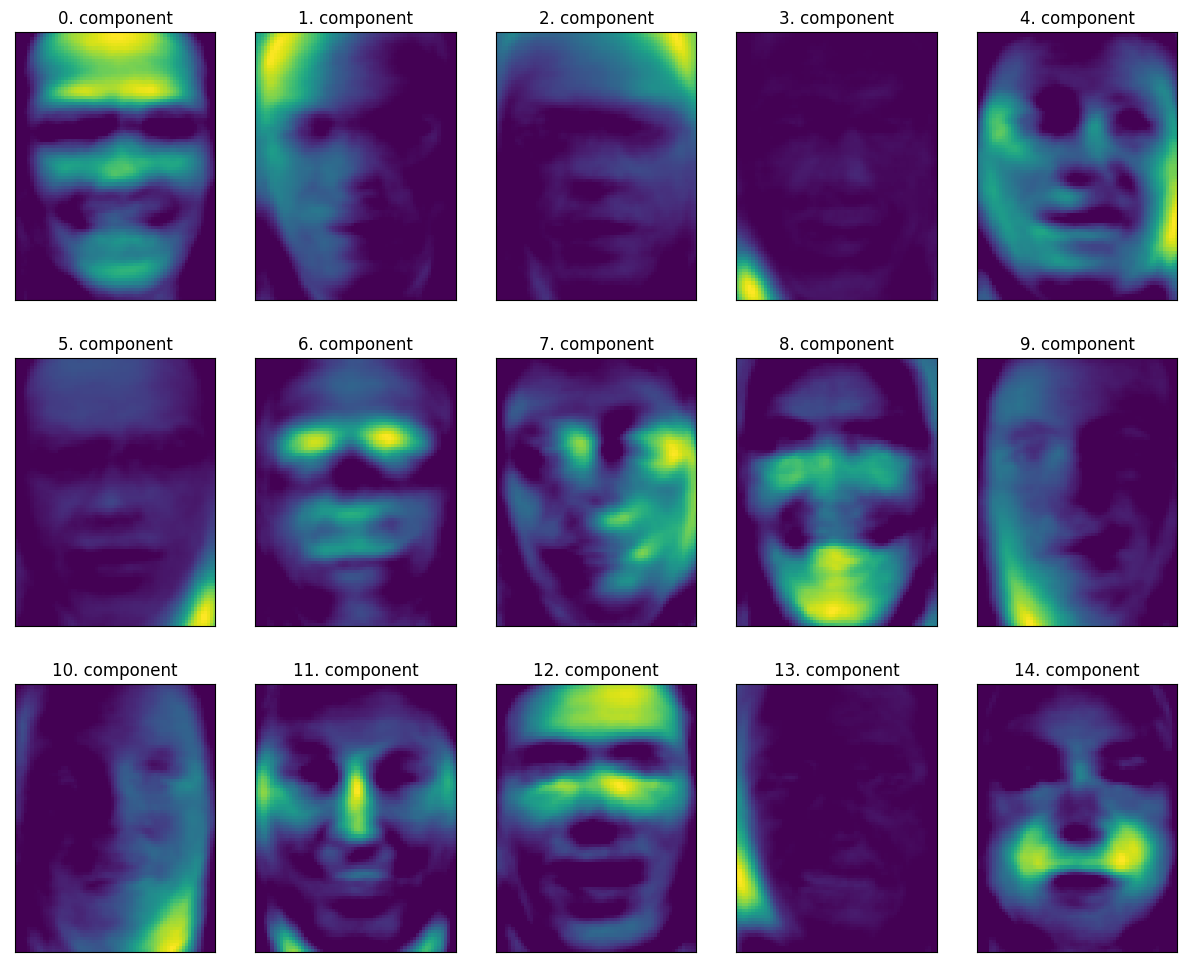

In [26]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_mnf = nmf.transform(X_train)
X_test_mnf = nmf.transform(X_test)

fig, axes = plt.subplots(
    3, 5, figsize = (15,12), subplot_kw= {'xticks':(), 'yticks':()})

for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title('{}. component'.format(i))


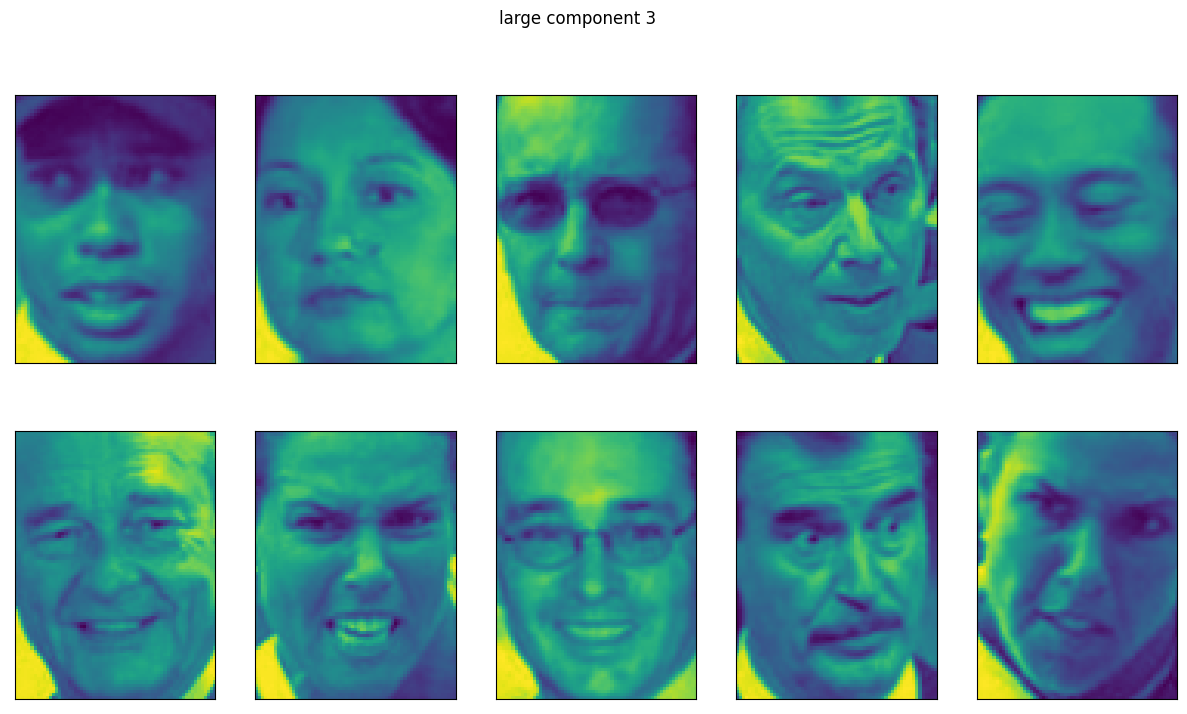

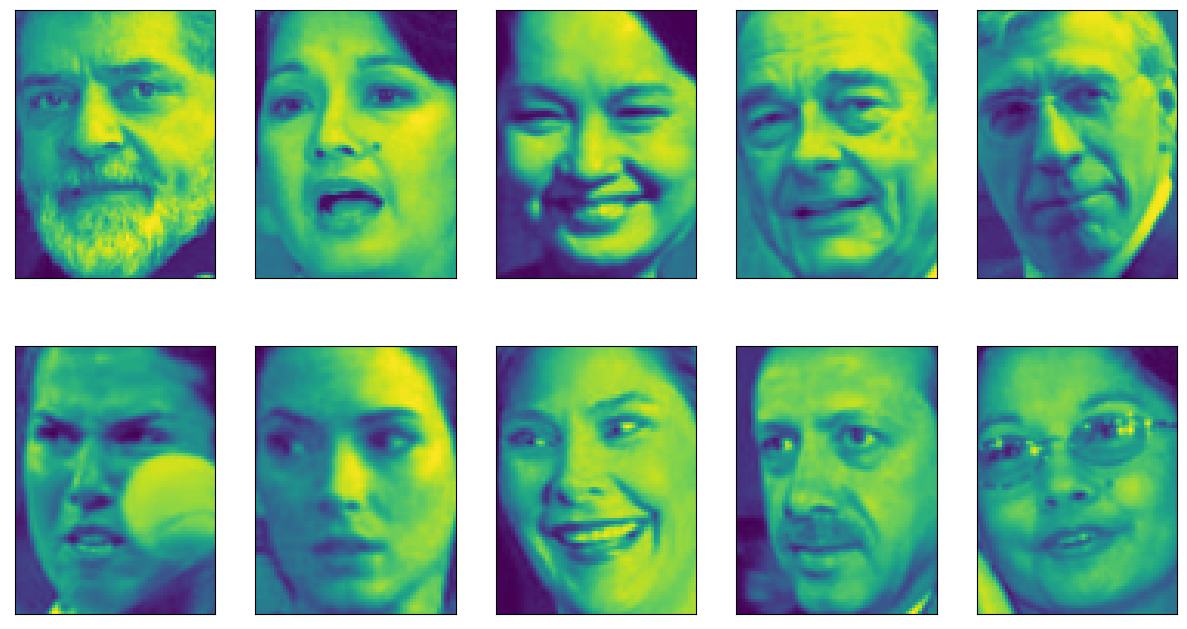

In [27]:
compn = 3
# sort by 3rd component, plot first 10 images
inds = np.argsort(X_train_mnf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15,8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle('large component 3')
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

compn = 7
# sort by 7th compnent, plot first 10 images
inds = np.argsort(X_train_mnf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize = (15, 8), 
    subplot_kw={'xticks':(), 'yticks':()})

for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))


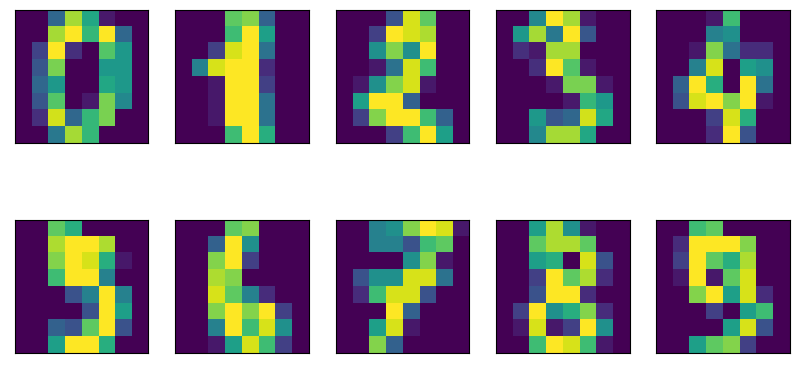

In [28]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize = (10,5), subplot_kw={'xticks':(), 'yticks':()})

for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)


Text(0, 0.5, 'Second principal component')

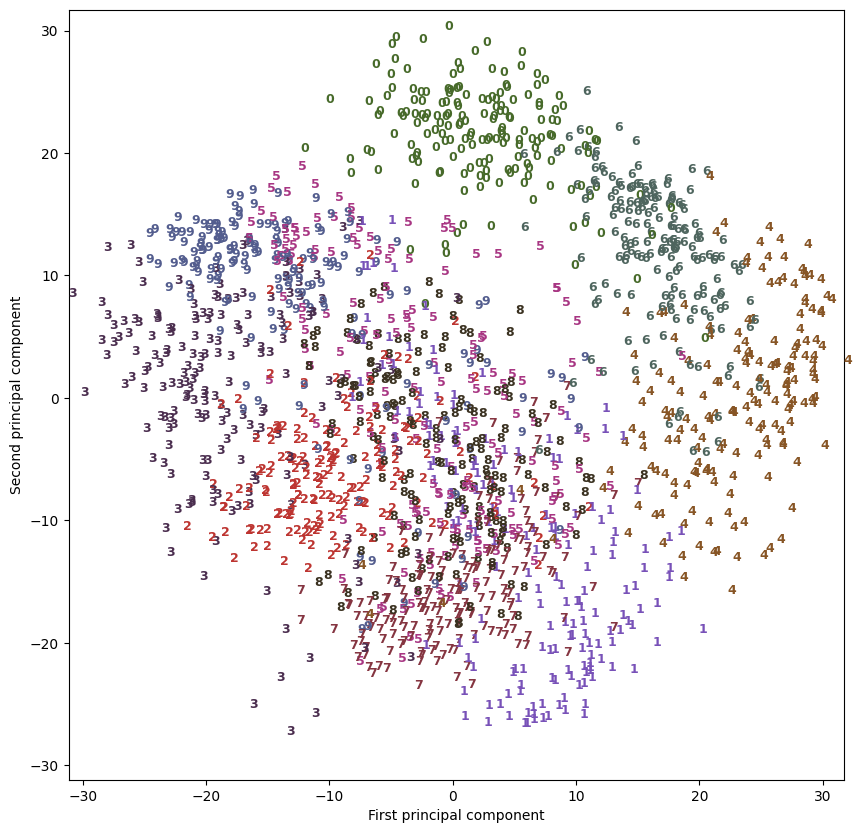

In [29]:
# build a PCA model
pca = PCA(n_components=2)
pca.fit(digits.data)
# transform the difits data onto the first two principal components
digits_pca = pca. transform(digits.data)
colors = ['#476a2a', '#7851b8', '#bd3430', '#4a2d4e', '#875525', 
    '#a83683', '#4e655e', '#853541', '#3a3120', '#535d8e']

plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
    color = colors[digits.target[i]],
    fontdict = {'weight': 'bold', 'size':9})

plt.xlabel('First principal component')
plt.ylabel('Second principal component')


In [30]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSE has no transform method
digits_tsne = tsne.fit_transform(digits.data)


Text(0, 0.5, 't-SNE feature 1')

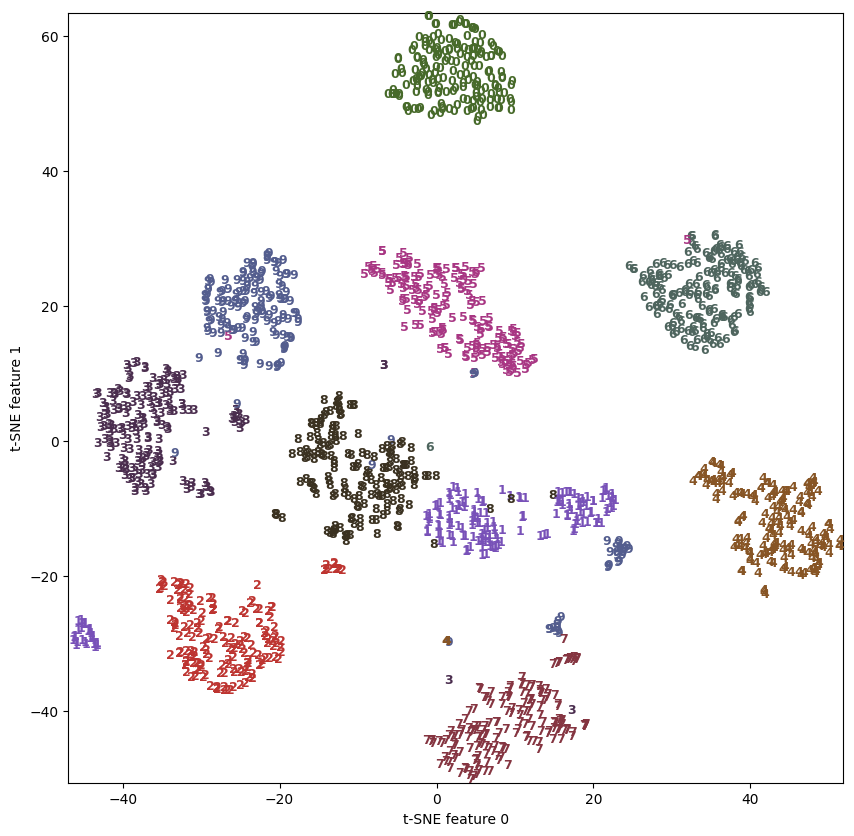

In [31]:
plt.figure(figsize = (10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:,0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:,1].max() + 1)
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
        color = colors[digits.target[i]],
        fontdict = {'weight': 'bold', 'size': 9})
plt.xlabel('t-SNE feature 0')
plt.ylabel('t-SNE feature 1')

In [32]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate synthetic two-dimensional data
X, y = make_blobs(random_state=1)

# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

c:\Users\burke\venv_python\ml_venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [33]:
print('Cluster memberships:\n{}'.format(kmeans.labels_))

Cluster memberships:
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


In [34]:
print(kmeans.predict(X))

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify = y_people, random_state=0)
nmf = NMF(n_components= 100, random_state=0)
nmf.fit(X_train)
pca = PCA(n_components = 100, random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters = 100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)


c:\Users\burke\venv_python\ml_venv\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\burke\venv_python\ml_venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'nmf')

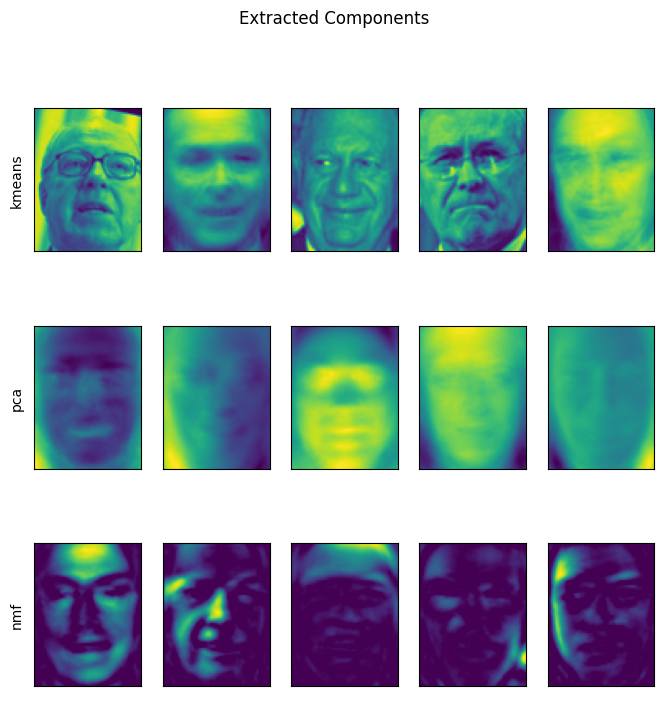

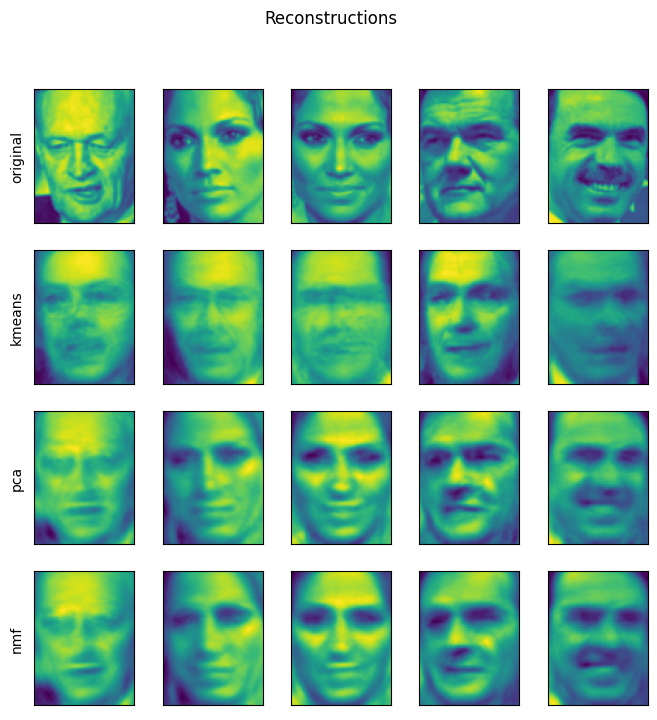

In [36]:
fig, axes = plt.subplots(3, 5, figsize=(8, 8), 
    subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle('Extracted Components')
for ax, comp_kmeans, comp_pca, comp_nmf in zip(
        axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap = 'viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape)) 

axes[0, 0].set_ylabel('kmeans')
axes[1, 0].set_ylabel('pca')
axes[2, 0].set_ylabel('nmf')

fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()},
        figsize=(8,8))
fig.suptitle('Reconstructions')
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(
    axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca, 
    X_reconstructed_nmf):
    
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))

axes[0, 0].set_ylabel('original')
axes[1, 0].set_ylabel('kmeans')
axes[2, 0].set_ylabel('pca')
axes[3, 0].set_ylabel('nmf')


Cluster memberships: 
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


c:\Users\burke\venv_python\ml_venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


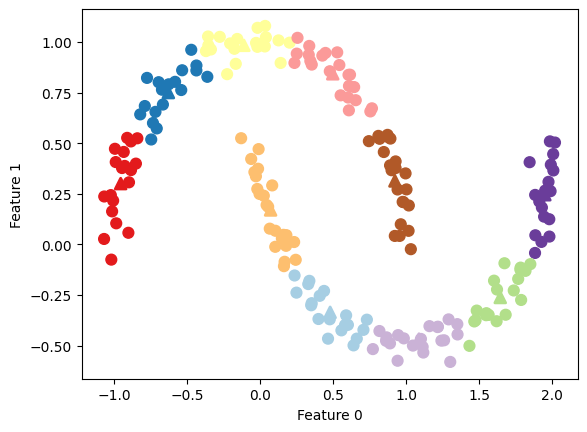

In [41]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state = 0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=60, 
    marker='^', c=range(kmeans.n_clusters), linewidths=2, cmap='Paired')

plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
print('Cluster memberships: \n{}'.format(y_pred))

In [42]:
distance_features = kmeans.transform(X)
print('Distance feature shape: {}'.format(distance_features.shape))
print('Distance features:\n{}'.format(distance_features))

Distance feature shape: (200, 10)
Distance features:
[[0.9220768  1.46553151 1.13956805 ... 1.16559918 1.03852189 0.23340263]
 [1.14159679 2.51721597 0.1199124  ... 0.70700803 2.20414144 0.98271691]
 [0.78786246 0.77354687 1.74914157 ... 1.97061341 0.71561277 0.94399739]
 ...
 [0.44639122 1.10631579 1.48991975 ... 1.79125448 1.03195812 0.81205971]
 [1.38951924 0.79790385 1.98056306 ... 1.97788956 0.23892095 1.05774337]
 [1.14920754 2.4536383  0.04506731 ... 0.57163262 2.11331394 0.88166689]]


Text(0, 0.5, 'cluster distance')

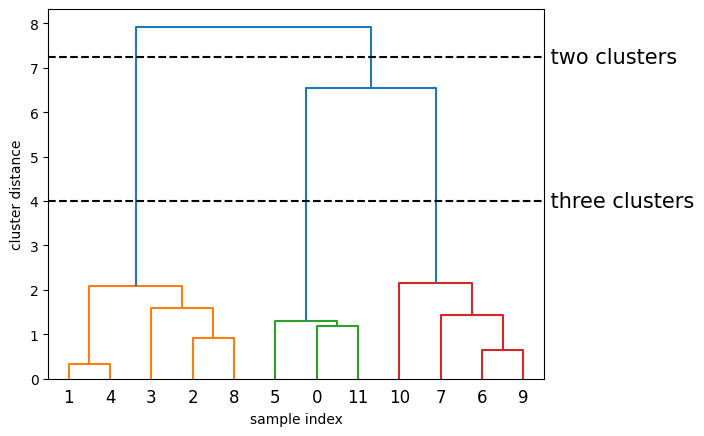

In [4]:
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(random_state=0, n_samples=12)

# Apply the ward clustering to the data array X
# The scipy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering

linkage_array = ward(X)

# Now plot the dendrogram fro the linkage_array containing the distances 
# between clusters

dendrogram(linkage_array)

# mark the cuts in the tree that signify two or three clusters

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' two clusters', va = 'center', fontdict={'size':15})
ax.text(bounds[1], 4, ' three clusters', va = 'center', fontdict={'size':15})
plt.xlabel('sample index')
plt.ylabel('cluster distance')

In [5]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print('Cluster memberships:\n{}'.format(clusters))

Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


Text(0, 0.5, 'feature 1')

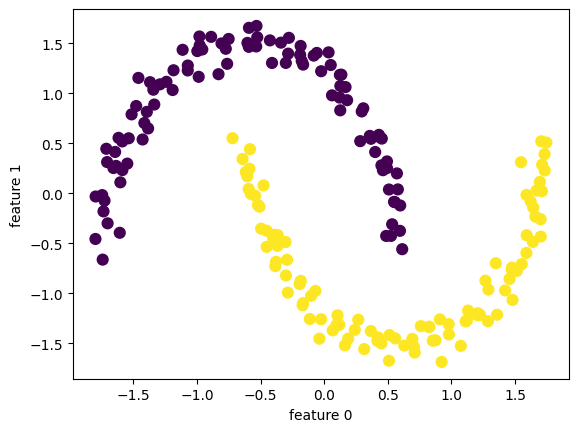

In [8]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:,1], c=clusters, cmap='viridis', s=60)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

c:\Users\burke\venv_python\ml_venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


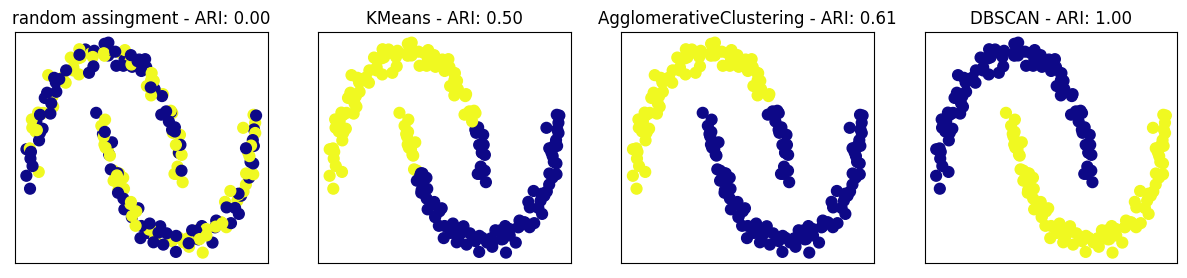

In [13]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import numpy as np


X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize = (15, 3), 
    subplot_kw={'xticks':(), 'yticks':()})

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

# create a random cluster asignmnet for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# plot random assignmnet
axes[0].scatter(X_scaled[:,0], X_scaled[:,1], c=random_clusters, cmap='plasma', 
                s=60)
axes[0].set_title('random assingment - ARI: {:.2f}'.format(
    adjusted_rand_score(y, random_clusters)
))

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignmnets and cluster centers
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap = 'plasma', s = 60)
    ax.set_title('{} - ARI: {:.2f}'.format(algorithm.__class__.__name__, adjusted_rand_score(y, clusters)))